In [31]:
# target parameters of f(x) = a + bx + cx^2 + dx^3
a = 2
b = -3
c = -2
d = 3

In [46]:
import numpy as np

# generate training inputs
np.random.seed(0)
x_train = np.random.uniform(-1, 1, 5000)
x_valid = np.random.uniform(-1.5, 1.5, 500)
x_valid.sort()
y_target = a + b * x_valid + c* x_valid**2 + d * x_valid**3 # ideal (target) linear function

sigma = 0.1 # noise standard deviation, for the moment it is absent
y_train = np.random.normal(a + b * x_train + c* x_train**2 + d * x_train**3, sigma) # actual measures from which we want to guess regression parameters
y_valid = np.random.normal(a + b * x_valid + c* x_valid**2 + d * x_valid**3, sigma)

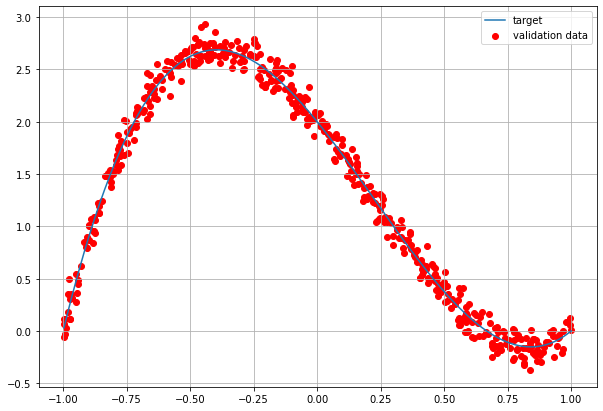

In [33]:
# plot validation and target dataset
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 7))
plt.plot(x_valid, y_target, label='target')
plt.scatter(x_valid, y_valid, color='r', label='validation data')
plt.legend()
plt.grid(True)
plt.show()

In [34]:
# compose the NN model
import tensorflow as tf
from tensorflow import keras

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras import backend as K
from tensorflow.keras.utils import get_custom_objects

model = tf.keras.Sequential()
# model.add(Dense(1, input_shape=(1,)))

model.add(Dense(80, input_shape=(1,), activation='relu'))
# Adds another layer with 18 units, each connected to 27 outputs of previous layer


# Last layer with 9 units, each connected to 18 outputs of previous layer
model.add(Dense(1))

# compile the model choosing optimizer, loss and metrics objects
model.compile(optimizer='sgd', loss='mse', metrics=['mse'])

In [35]:
# get a summary of our composed model
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 80)                160       
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 81        
Total params: 241
Trainable params: 241
Non-trainable params: 0
_________________________________________________________________


In [36]:
# fit the model using training dataset
# over 10 epochs of 32 batch size each
# report training progress against validation data
history = model.fit(x=x_train, y=y_train, 
          batch_size=100, epochs=80,
          shuffle=True, # a good idea is to shuffle input before at each epoch
          validation_data=(x_valid, y_valid))

Epoch 1/80
50/50 [==============================] - 1s 6ms/step - loss: 1.4032 - mse: 1.4032 - val_loss: 0.6879 - val_mse: 0.6879
Epoch 2/80
50/50 [==============================] - 0s 3ms/step - loss: 0.5683 - mse: 0.5683 - val_loss: 0.5084 - val_mse: 0.5084
Epoch 3/80
50/50 [==============================] - 0s 4ms/step - loss: 0.4600 - mse: 0.4600 - val_loss: 0.4480 - val_mse: 0.4480
Epoch 4/80
50/50 [==============================] - 0s 4ms/step - loss: 0.4117 - mse: 0.4117 - val_loss: 0.4110 - val_mse: 0.4110
Epoch 5/80
50/50 [==============================] - 0s 3ms/step - loss: 0.3780 - mse: 0.3780 - val_loss: 0.3807 - val_mse: 0.3807
Epoch 6/80
50/50 [==============================] - 0s 3ms/step - loss: 0.3504 - mse: 0.3504 - val_loss: 0.3533 - val_mse: 0.3533
Epoch 7/80
50/50 [==============================] - 0s 3ms/step - loss: 0.3253 - mse: 0.3253 - val_loss: 0.3292 - val_mse: 0.3292
Epoch 8/80
50/50 [==============================] - 0s 3ms/step - loss: 0.3022 - mse: 0.30

50/50 [==============================] - 0s 3ms/step - loss: 0.0416 - mse: 0.0416 - val_loss: 0.0426 - val_mse: 0.0426
Epoch 64/80
50/50 [==============================] - 0s 3ms/step - loss: 0.0411 - mse: 0.0411 - val_loss: 0.0421 - val_mse: 0.0421
Epoch 65/80
50/50 [==============================] - 0s 3ms/step - loss: 0.0408 - mse: 0.0408 - val_loss: 0.0417 - val_mse: 0.0417
Epoch 66/80
50/50 [==============================] - 0s 3ms/step - loss: 0.0404 - mse: 0.0404 - val_loss: 0.0414 - val_mse: 0.0414
Epoch 67/80
50/50 [==============================] - 0s 3ms/step - loss: 0.0401 - mse: 0.0401 - val_loss: 0.0409 - val_mse: 0.0409
Epoch 68/80
50/50 [==============================] - 0s 3ms/step - loss: 0.0397 - mse: 0.0397 - val_loss: 0.0407 - val_mse: 0.0407
Epoch 69/80
50/50 [==============================] - 0s 3ms/step - loss: 0.0394 - mse: 0.0394 - val_loss: 0.0402 - val_mse: 0.0402
Epoch 70/80
50/50 [==============================] - 0s 3ms/step - loss: 0.0391 - mse: 0.0391 -

In [41]:
# return weights and biases
model.get_weights()

[array([[-0.37442306,  0.02740347, -0.46171826, -0.10259766,  0.42068794,
          0.32628232,  0.11575442,  0.09379794, -0.4094961 ,  0.23502603,
          0.1028893 ,  0.20924509,  0.27493042,  0.05139881, -0.05782357,
         -0.60369074,  0.16148743, -0.09063994, -0.3131252 ,  0.1868068 ,
         -0.2871356 , -0.67051107,  0.1970939 , -0.447041  ,  0.40987927,
         -0.31532645, -0.24224266, -0.2703824 ,  0.23207577,  0.16610762,
          0.20604871,  0.4990265 ,  0.13474277,  0.5919024 , -0.13782056,
          0.09582411,  0.3279324 , -0.6462521 , -0.28193766, -0.01819289,
          0.03495877, -0.14868909, -0.08170015, -0.15836656,  0.08610546,
         -0.55522   , -0.08923274,  0.03503643, -0.03212567, -0.206575  ,
          0.13775414,  0.30543464,  0.11746517, -0.676808  , -0.03623156,
          0.19396871,  0.08835848,  0.1963681 ,  0.19244942,  0.39290014,
          0.25678298,  0.21772484,  0.3702879 , -0.30677733, -0.13503066,
         -0.44482142,  0.4718979 ,  0.

In [42]:
# evaluate model
score = model.evaluate(x_valid, y_valid, batch_size=32, verbose=1)

# print performance
print()
print('Test loss:', score[0])
print('Test accuracy:', score[1])


16/16 [==============================] - 0s 3ms/step - loss: 0.0369 - mse: 0.0369

Test loss: 0.036855317652225494
Test accuracy: 0.036855317652225494


In [43]:
# evaluate model with the exact curve
score = model.evaluate(x_valid, y_target, batch_size=32, verbose=1)

# print performance
print()
print('Test loss:', score[0])
print('Test accuracy:', score[1])


16/16 [==============================] - 0s 3ms/step - loss: 0.0263 - mse: 0.0263

Test loss: 0.026265237480401993
Test accuracy: 0.026265237480401993


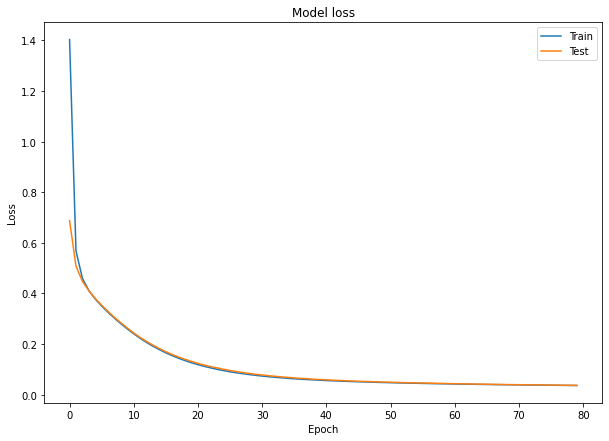

In [44]:
# look into training history
# Plot training & validation loss values
plt.figure(figsize=(10, 7))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='best')
plt.show()

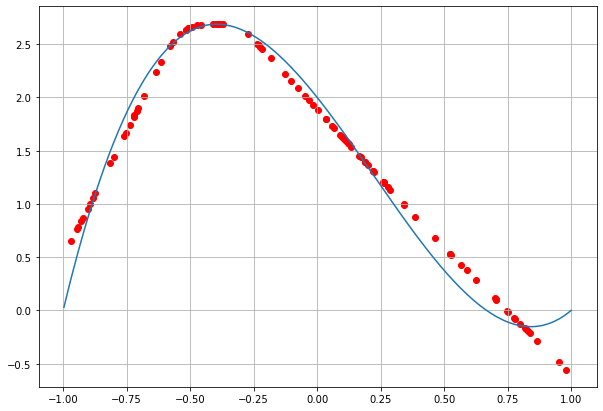

In [45]:
x_predicted = np.random.uniform(-1, 1, 100)
y_predicted = model.predict(x_predicted)
plt.figure(figsize=(10, 7))
plt.scatter(x_predicted, y_predicted,color='r')
plt.plot(x_valid, y_target)
plt.grid(True)
plt.show()

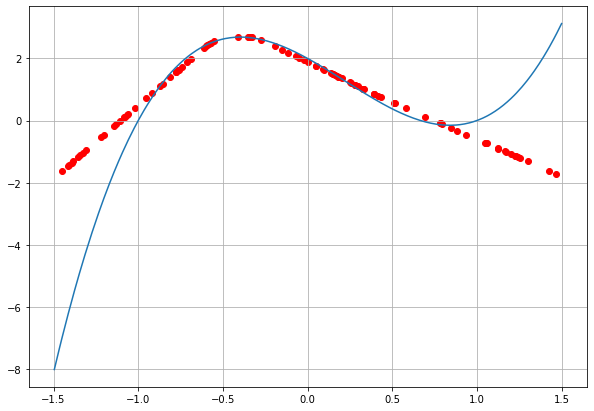

In [47]:
x_predicted = np.random.uniform(-1.5, 1.5, 100)
y_predicted = model.predict(x_predicted)
plt.figure(figsize=(10, 7))
plt.scatter(x_predicted, y_predicted,color='r')

#x_valid = np.random.uniform(-1.5, 1.5, 50)
#y_target = a + b * x_valid + c* x_valid**2 + d * x_valid**3 # ideal (target) linear function

plt.plot(x_valid, y_target)
plt.grid(True)
plt.show()